<a href="https://colab.research.google.com/github/adminshivam/Data-Science/blob/main/Seaborn_Practice_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SEABORN***

> *This is an notebook for seaborn document tutorial. Covers almost all functions provided by seaborn as of year 2021. Besides this please do check for updates.*






## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Dataset**

> **Note : May use another dataset aterwards**



In [2]:
df = sns.load_dataset("tips")

## **Relational Plots**

### **relplot**

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


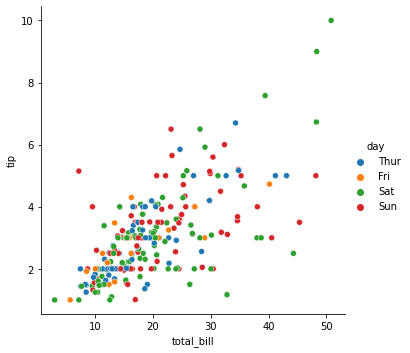

In [4]:
sns.relplot(x="total_bill",y="tip", hue="day",data=df)

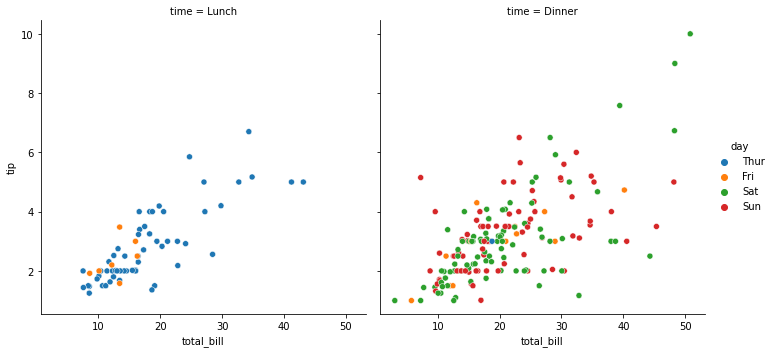

In [5]:
sns.relplot(x="total_bill",y="tip", hue="day",data=df, col="time")

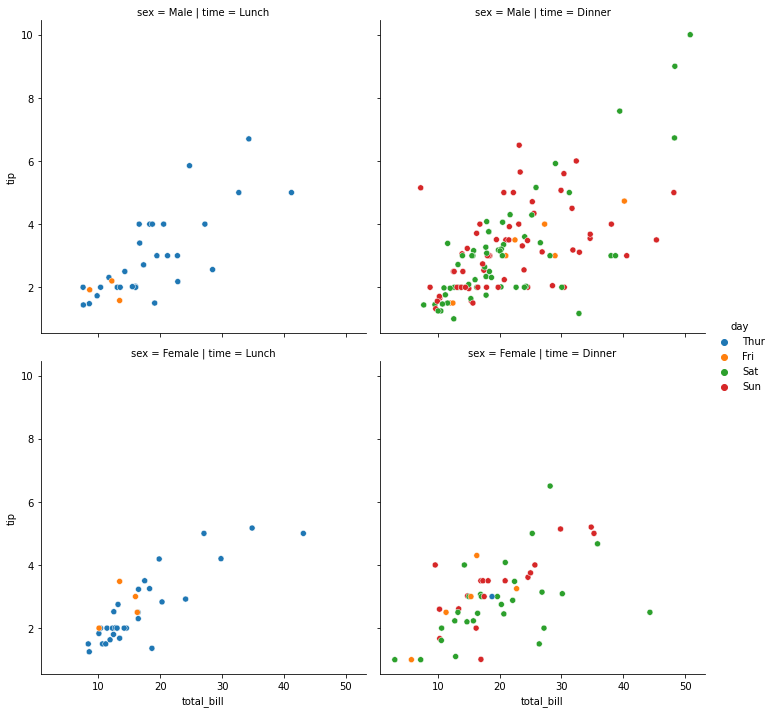

In [6]:
sns.relplot(x="total_bill",y="tip", hue="day",data=df, col="time",row="sex")


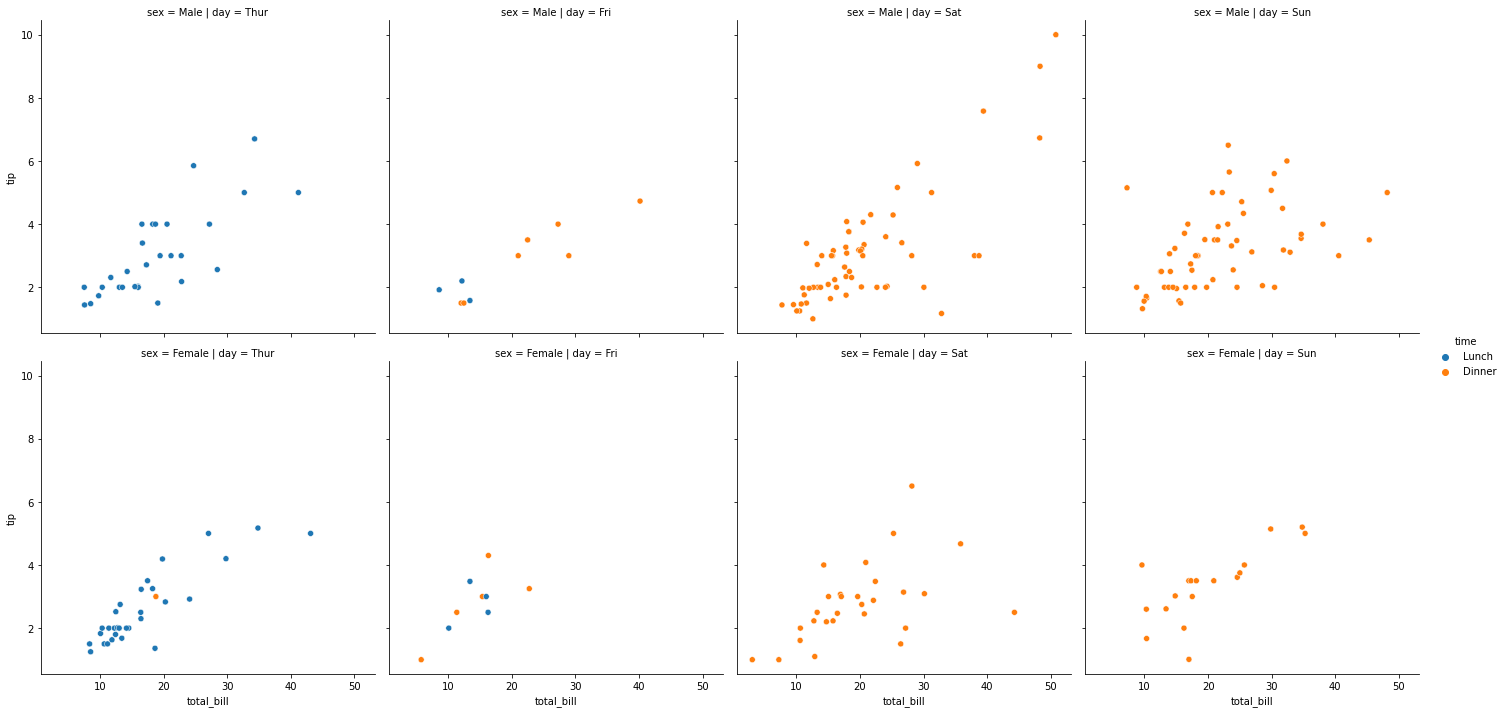

In [7]:
sns.relplot(x="total_bill",y="tip", hue="time",data=df, col="day",row = "sex")

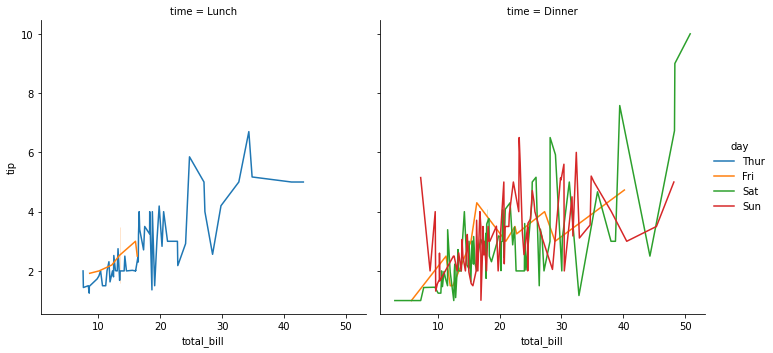

In [8]:
sns.relplot(x="total_bill",y="tip", hue="day",data=df, col="time", kind="line")

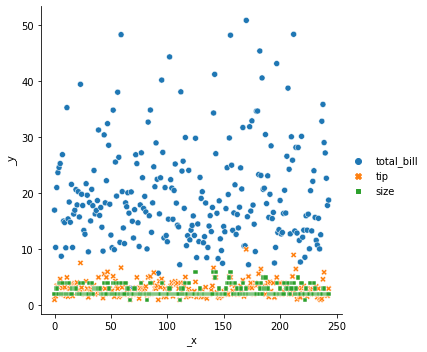

In [9]:
sns.relplot(data=df)

### **scatterplot**

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


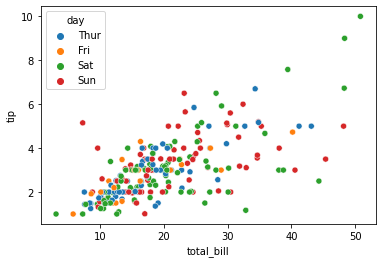

In [11]:
sns.scatterplot(x="total_bill",y="tip", hue="day",data=df)

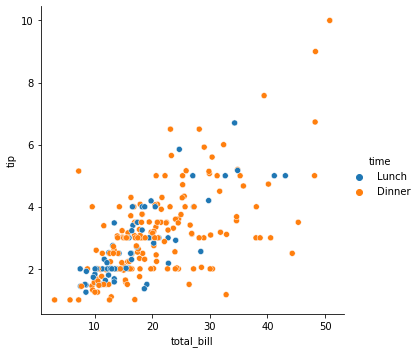

In [12]:
sns.relplot(x="total_bill",y="tip", hue="time",data=df)

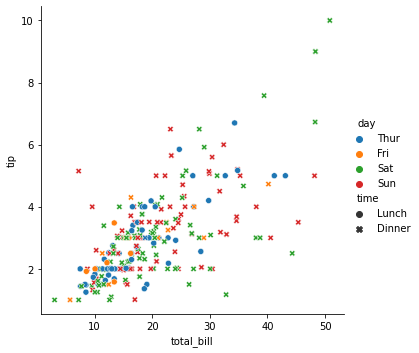

In [13]:
sns.relplot(x="total_bill",y="tip", hue="day",style="time",data=df)

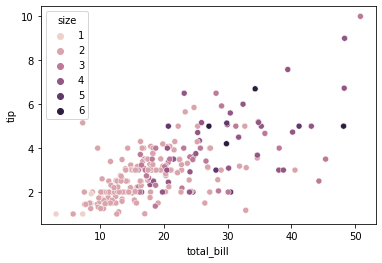

In [14]:
sns.scatterplot(data=df, x="total_bill", y="tip", hue="size")

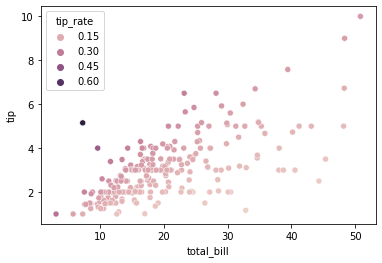

In [15]:
tip_rate = df.eval("tip/total_bill").rename("tip_rate")
sns.scatterplot(data=df,x="total_bill",y="tip",hue=tip_rate)

***Data extraction out of the scatterpolt***





In [16]:
df[df.eval("tip/total_bill") == df.eval("tip/total_bill").max()]

,total_bill,tip,sex,smoker,day,time,size
172,7.25,5.15,Male,Yes,Sun,Dinner,2


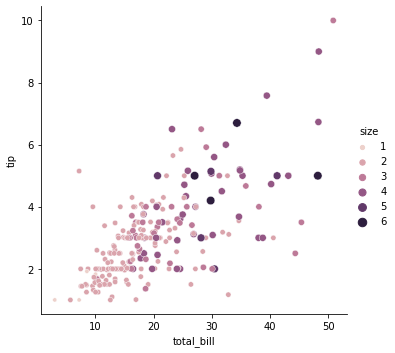

In [17]:
sns.relplot(data=df, x="total_bill", y="tip", hue = "size", size="size",kind="scatter")

### **lineplot**

In [18]:
df = sns.load_dataset("flights")

In [19]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [20]:
may_flights = df[df['month']=='May']
may_flights.head()

,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172
40,1952,May,183
52,1953,May,229


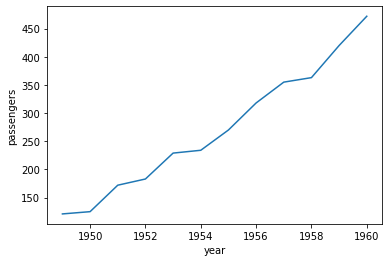

In [21]:
sns.lineplot(data=may_flights,x="year",y="passengers")

In [22]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [23]:
flights_pivot = df.pivot("year","month","passengers")
flights_pivot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


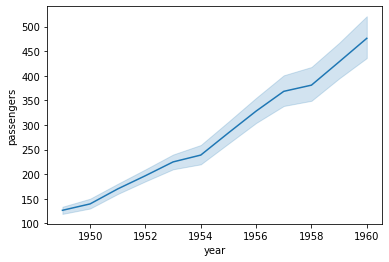

In [24]:
sns.lineplot(data=df,x="year",y="passengers")

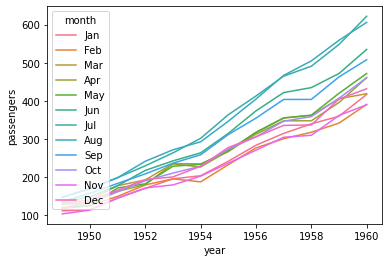

In [25]:
sns.lineplot(data=df,x="year",y="passengers",hue="month")

**A more Complex Dataset**

In [26]:
df = sns.load_dataset("fmri")
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


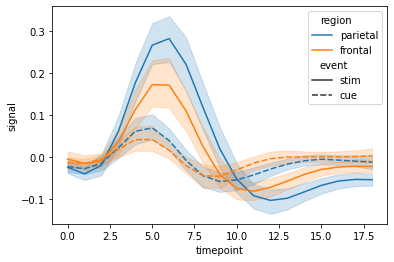

In [27]:
sns.lineplot(data=df,x='timepoint',y='signal',hue='region',style='event')

In [28]:
df = sns.load_dataset("dots").query("align == 'dots'")
df.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


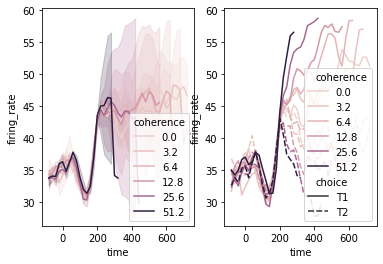

<Figure size 2880x1440 with 0 Axes>

In [29]:
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(40,20))
sns.lineplot(data=df, x="time", y="firing_rate", hue="coherence",ax=ax[0])
sns.lineplot(data=df, x="time", y="firing_rate", hue="coherence", style="choice",ax=ax[1])
fig.show()

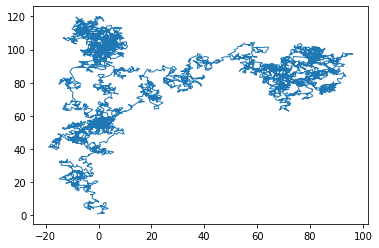

In [30]:
x, y = np.random.normal(size=(2, 5000)).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1)

## **Distribution Plots**

### **displot**

In [31]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


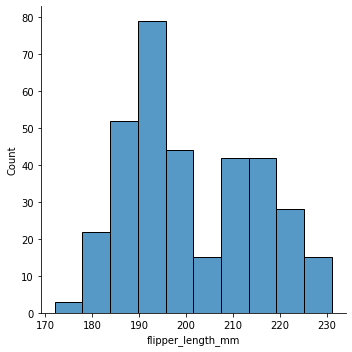

In [32]:
sns.displot(data=df, x="flipper_length_mm", kind="hist")

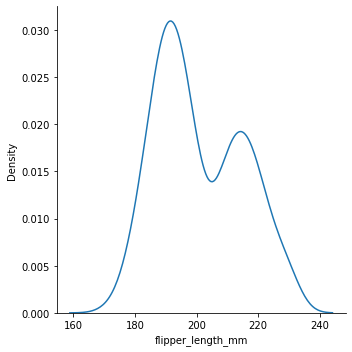

In [33]:
sns.displot(data=df, x="flipper_length_mm", kind="kde")

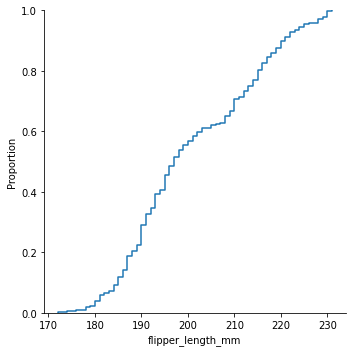

In [34]:
sns.displot(data=df, x="flipper_length_mm", kind="ecdf")


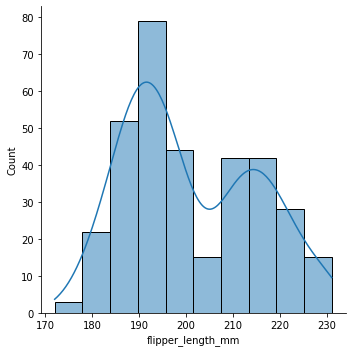

In [35]:
sns.displot(data=df, x="flipper_length_mm", kde = True)

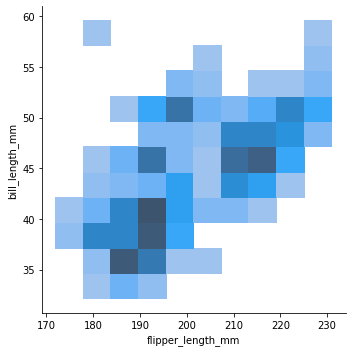

In [36]:
sns.displot(data=df, x="flipper_length_mm", y="bill_length_mm")

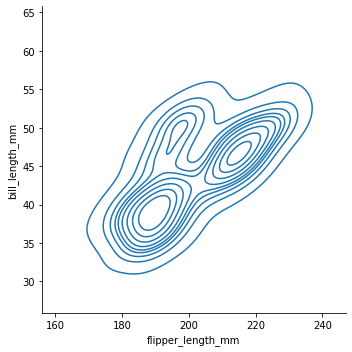

In [37]:
sns.displot(data=df, x="flipper_length_mm", y="bill_length_mm", kind="kde")

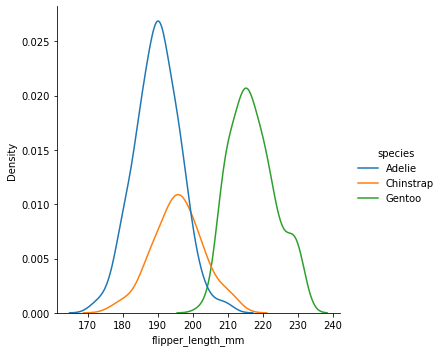

In [38]:
sns.displot(data=df, x="flipper_length_mm",hue="species", kind="kde")

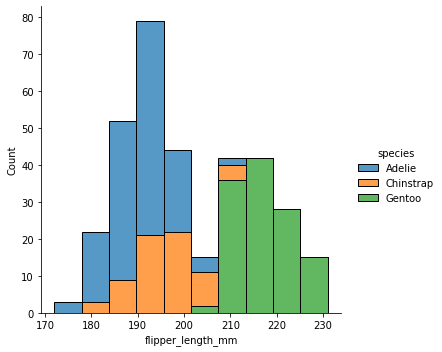

In [39]:
sns.displot(data=df, x="flipper_length_mm",hue="species", multiple="stack")

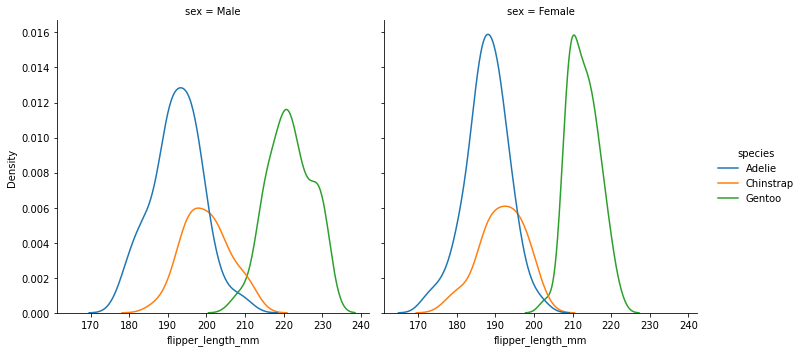

In [40]:
sns.displot(data=df, x="flipper_length_mm", hue="species", col="sex", kind="kde")

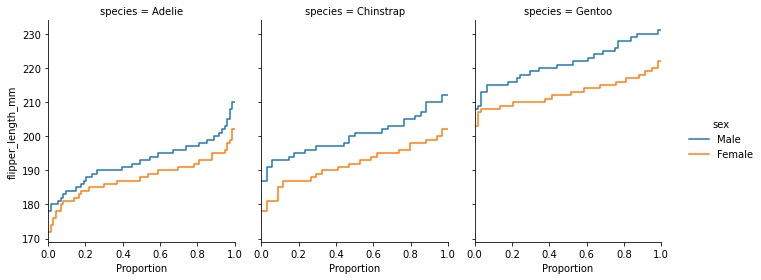

In [41]:
sns.displot(
    data=df, y="flipper_length_mm", hue="sex", col="species",
    kind="ecdf", height=4, aspect=.8,
)

## **histplot**

In [42]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


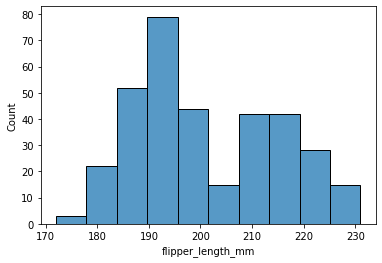

In [43]:
sns.histplot(data=df, x="flipper_length_mm")

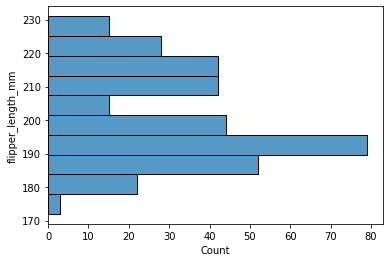

In [44]:
sns.histplot(data=df, y="flipper_length_mm")


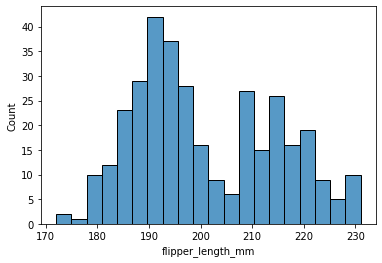

In [45]:
sns.histplot(data=df, x="flipper_length_mm",bins=20)


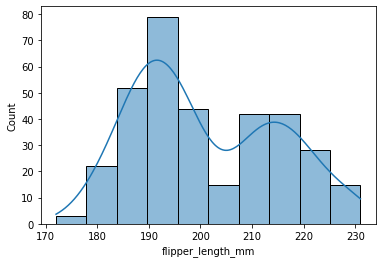

In [46]:
sns.histplot(data=df, x="flipper_length_mm", kde = True)

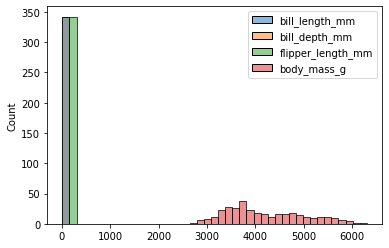

In [47]:
sns.histplot(data=df)

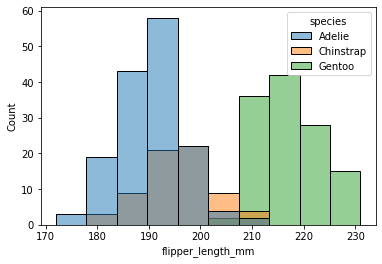

In [48]:
sns.histplot(data=df, x="flipper_length_mm", hue="species")

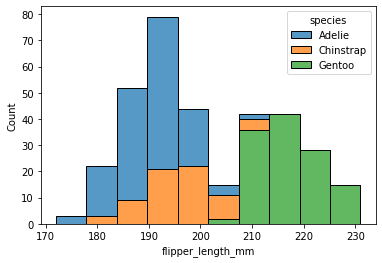

In [49]:
sns.histplot(data=df, x="flipper_length_mm", hue="species", multiple="stack")

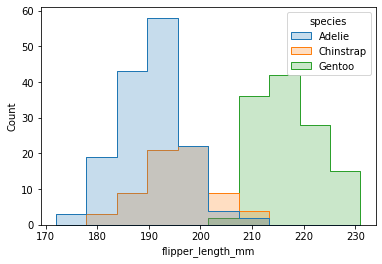

In [50]:
sns.histplot(data=df, x="flipper_length_mm", hue="species", element="step")

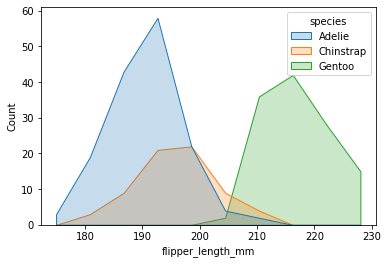

In [51]:
sns.histplot(data=df, x="flipper_length_mm", hue="species", element="poly")

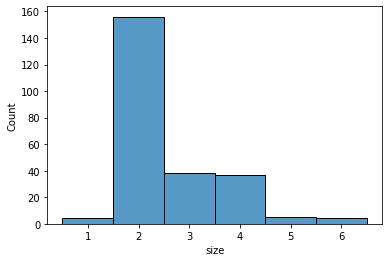

In [52]:
df = sns.load_dataset("tips")
sns.histplot(data=df, x="size", discrete=True)

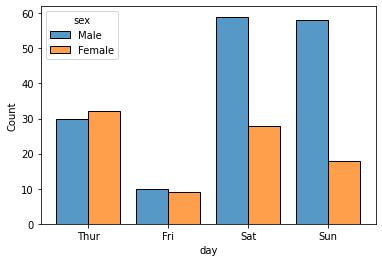

In [53]:
sns.histplot(data=df, x="day", hue="sex", multiple="dodge", shrink=.8)

In [54]:
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


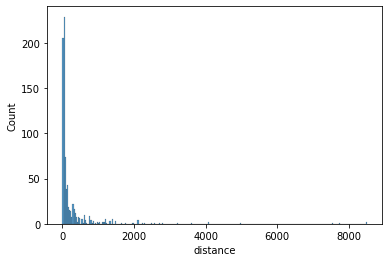

In [55]:
sns.histplot(data=df, x="distance")

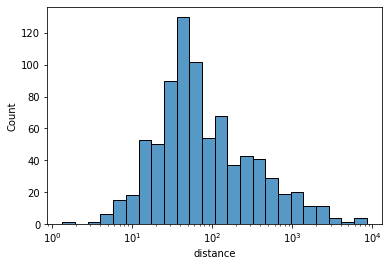

In [56]:
sns.histplot(data=df, x="distance", log_scale=True)

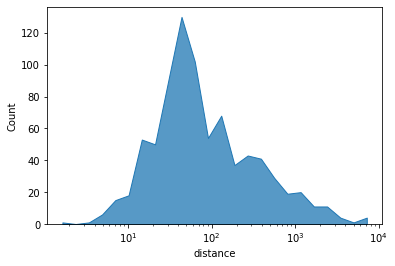

In [57]:
sns.histplot(data=df, x="distance", log_scale=True, element="poly")

## **kdeplot**

In [59]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


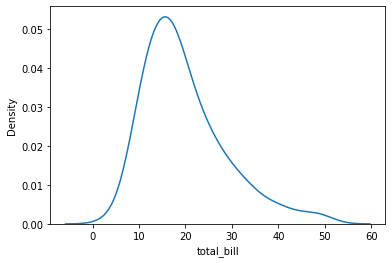

In [60]:
sns.kdeplot(data=df, x="total_bill")

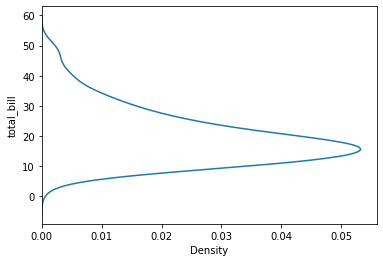

In [61]:
sns.kdeplot(data=df, y="total_bill")

In [62]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


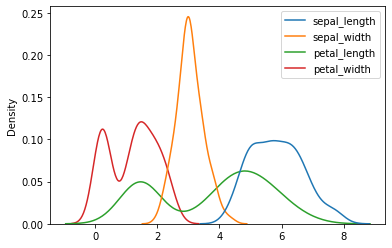

In [63]:
sns.kdeplot(data=df)

In [66]:
df["species"] = pd.get_dummies(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


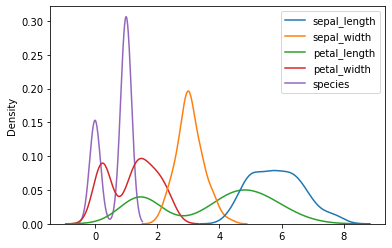

In [67]:
sns.kdeplot(data=df)

In [70]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


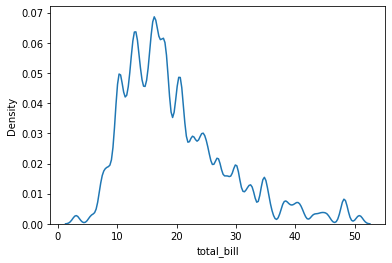

In [71]:
sns.kdeplot(data=df, x="total_bill", bw_adjust=.2)

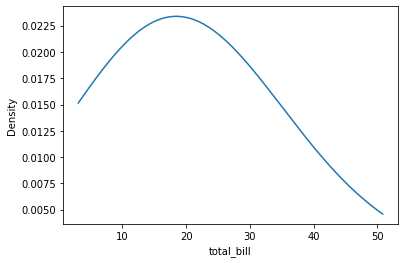

In [79]:
sns.kdeplot(data=df, x="total_bill", bw_adjust=5, cut=0)

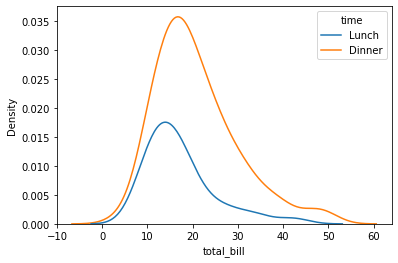

In [81]:
sns.kdeplot(data=df, x="total_bill", hue="time")

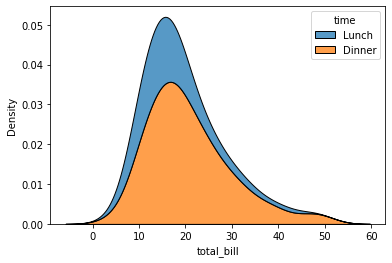

In [86]:
sns.kdeplot(data=df, x="total_bill", hue="time", multiple="stack")


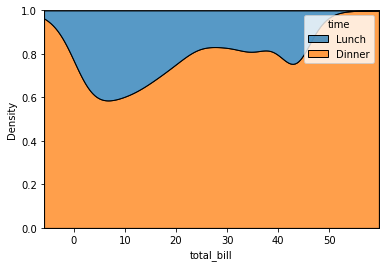

In [87]:
sns.kdeplot(data=df, x="total_bill", hue="time", multiple="fill")

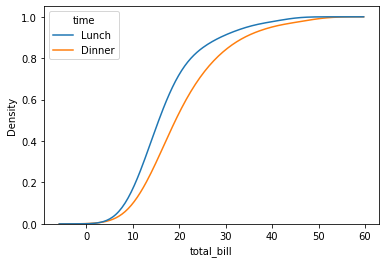

In [96]:
sns.kdeplot(data=df, x="total_bill", hue="time", cumulative=True, common_grid=True, common_norm=False)

In [97]:
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


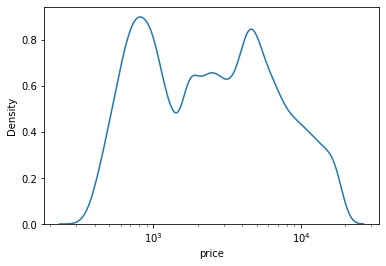

In [99]:
sns.kdeplot(data=df, x="price", log_scale=True)

In [101]:
df = sns.load_dataset("geyser")
df.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


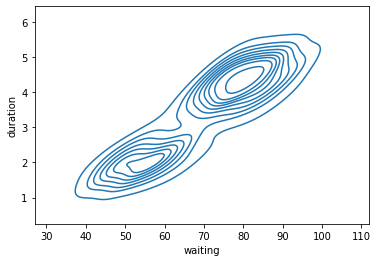

In [102]:
sns.kdeplot(data=df, x="waiting", y="duration")

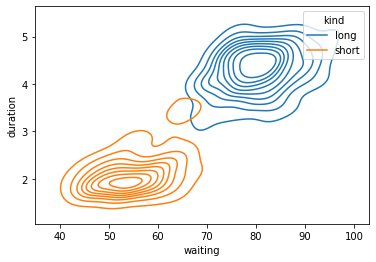

In [103]:
sns.kdeplot(data=df, x="waiting", y="duration", hue="kind")

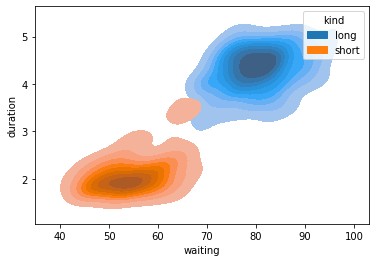

In [104]:
sns.kdeplot(data=df, x="waiting", y="duration", hue="kind", fill=True)

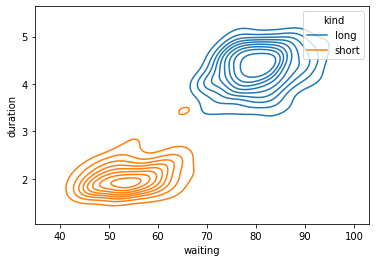

In [114]:
sns.kdeplot(data=df, x="waiting", y="duration", hue="kind", thresh=0.1)


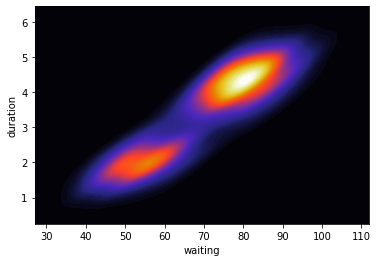

In [125]:
sns.kdeplot(
    data=df, x="waiting", y="duration",
    fill=True, thresh=0, levels=100, cmap="CMRmap",
)
